<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных<br></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [ ]:
# Импортируем библиотеку Pandas
import pandas as pd
# Импортируем библиотеку для постраения графиков matplotlib.pyplot.
import matplotlib.pyplot as plt
# Импортируем библиотеку для постраения графиков seaborn.
import seaborn as sns

In [5]:
# Прочитаем исходный DataFrame
df = pd.read_csv('real_estate_data.csv', sep = '\t') 
# Сделаем отображение всех столбцов DataFrame
pd.set_option('display.max_columns', None)

In [6]:
# Выведим первые 5 строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Описание данных<br>
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
* `balcony` — число балконов<br>
* `ceiling_height` — высота потолков (м)<br>
* `cityCenters_nearest` — расстояние до центра города (м)<br>
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
* `first_day_exposition` — дата публикации<br>
* `floor` — этаж<br>
* `floors_total` — всего этажей в доме<br>
* `is_apartment` — апартаменты (булев тип)<br>
* `kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
* `last_price` — цена на момент снятия с публикации<br>
* `living_area` — жилая площадь в квадратных метрах (м²)<br>
* `locality_name` — название населённого пункта<br>
* `open_plan` — свободная планировка (булев тип)<br>
* `parks_around3000` — число парков в радиусе 3 км<br>
* `parks_nearest` — расстояние до ближайшего парка (м)<br>
* `ponds_around3000` — число водоёмов в радиусе 3 км<br>
* `ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
* `rooms` — число комнат<br>
* `studio` — квартира-студия (булев тип)<br>
* `total_area` — площадь квартиры в квадратных метрах (м²)<br>
* `total_images` — число фотографий квартиры в объявлении<br>

In [7]:
# Применяем метод .info() к DF для получения более подробной информации.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Импортировали библиотеку Pandas. Прочитали файл с данными и сохранили его в переменной `df`.<br>
Вывели первые 5 значений для ознакомления с таблицей. Мы применили метод sep = '\t' для корректного разделения столбцов.<br>
Далее отобразили описание данных в DF. Воспользовались df.info() и с помощью него видим:<br>
1. DF имеет 22 столбца и 23699 строк.<br> 
2. В DF присутвуют разные типы данных (int64, float64, object, bool).(Нужно проверить, корректный ли тип данных для столпца, возможно, стоит его изменить).<br>
3. В DF имеются пропуски в 12 столбцах (Нужно проверить, что за пропуски и как с ними бороться) На первый взгляд можно предположить, что они связанны с тем, что продавцы не указали полные данные, либо пункт не относится к их квартире.<br>

В `first_day_exposition` формат даты и времени: 2019-03-07T00:00:00.

## Предобработка данных

In [8]:
# Проверяем сколько есть пропусков в каждом столбце. Далее начнем разбираться в каждом из них.
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
# Переведем метры в километры в столбце "cityCenters_nearest" и создадим новый столбец.
df['cityCenters_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_km'] = df['cityCenters_km'].round()

In [10]:
# Смотрим по порядку. Первый столбец с пропусками это 'ceiling_height' - высота потолков (м) с типом данных float64.
nan_ceiling_height = df[df['ceiling_height'].isna()]
len(nan_ceiling_height)

9195

9195 значений это 39% от DF - для удаления слишком большой %, который может повлиять на исследование.
Тип пропусков (NaN). Удалять пропуски будет не корректно. Заменять на медиану, либо среднее значение приведет к ошибке иследования.
NaN замещает отсутствующее в ячейке число и принадлежит к типу float64, поэтому с ним можно проводить математические операции.

In [11]:
# Мы смотрим среднюю высоту потолков на каждом километре удаленности от центра.
avg_ceiling_height = df.pivot_table(index='cityCenters_km', values=['ceiling_height'], aggfunc='mean')
avg_ceiling_height['ceiling_height'] = avg_ceiling_height['ceiling_height'].round(1)
avg_ceiling_height.head(10)

,ceiling_height
cityCenters_km,
0.0,3.4
1.0,3.2
2.0,3.2
3.0,3.3
4.0,3.2
5.0,3.1
6.0,3.0
7.0,2.9
8.0,3.2


In [12]:
# Проверим на анамалии методом .describe()
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
# Мы видим анамально большое максимальное значение 100, нужно проверить много ли таких отклонений.
# Проверим значения, где потолок выше 5м(взяли больше 5м, с логикой, что в апартаментах могут достигать такой высоты)
len(df[df['ceiling_height'] > 5])

36

In [14]:
# Значения, где потолок выше 5м всего 36 квартир. Можем удалить их из DF.
df = df.drop(df[df.ceiling_height > 5].index)

In [15]:
# Смотрим далее. Следующий столбец с пропусками это 'floors_total' - всего этажей в доме с типом данных float64.
nan_floors_total = df[df['floors_total'].isna()]
len(nan_floors_total)

86

In [16]:
# 86 значений это 0,4% от DF - эти строки с пропусками можем удалить, это не повлияет на исследование.
df = df.dropna(subset=['floors_total'])

In [17]:
# Также нужно заменить тип данных на Int64 методом .astype('int').
df['floors_total'] = df['floors_total'].astype('int')

In [18]:
# Проверим на анамалии методом .describe()
df['floors_total'].describe().astype('int')

count    23577
mean        10
std          6
min          1
25%          5
50%          9
75%         16
max         60
Name: floors_total, dtype: int64

In [19]:
# Смотрим далее. Следующий столбец с пропусками это 'living_area' - жилая площадь в квадратных метрах (м²) с типом данных float64.
nan_living_area = df[df['living_area'].isna()]
len(nan_living_area)

1868

1868 значений это 8% от ДФ - для удаления слишком большой % который может повлиять на исследование.
Тип пропусков (NaN). Удалять пропуски будет не корректно. Если есть общая площадь (total_area) , то можно найти большую зависимость между основными параметрами и заменить пропуски на среднее значение.

In [20]:
df['living_area'].corr(df['total_area'])

0.9395709914672624

Мы видим сильную зависимость жилой площади от всей площади квартиры. Опираясь на данный факт мы можем найти какая в среднем доля жилой площади от всей площади, и заменить им пропуски.

In [21]:
living_share_mean = (df['living_area'] / df['total_area']).mean()
living_share_mean

0.5648736522911788

In [22]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_share_mean)

In [23]:
# Нужно проверить на анамалии методом .describe()
df['living_area'].describe()

count    23577.000000
mean        34.546787
std         22.264021
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [24]:
# Жилая площадь меньше 8 кв. метров кажется аномалией, проверим, сколько таких квартир.
len(df[df['living_area'] < 8 ])

11

In [25]:
# Мы наблюдаем 11 таких объектов, которые предлагаем удалить из DF.
df = df.drop(df[df.living_area < 8].index)

In [26]:
# Смотрим далее. Следующий столбец с пропусками это 'is_apartment' - апартаменты с типом данных bool.
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [27]:
# Видим тип пропусков (NaN). Возможно, те квартиры, которые не указали данный параметр не являются апартаментами.
# Имеет смысл заменить их на False.
df['is_apartment'] = df['is_apartment'].fillna(False)

In [28]:
# Следующий столбец с пропусками это 'kitchen_area' - площадь кухни в квадратных метрах (м²) с типом данных float64.
nan_kitchen_area = df[df['kitchen_area'].isna()]
len(nan_kitchen_area)

2217

2217 значений это 9,5% от DF - для удаления слишком большой % который может повлиять на исследование.
Тип пропусков (NaN). Удалять пропуски будет не корректно. Если есть общая площадь (total_area), то можно оставить значения NaN.
NaN замещает отсутствующее в ячейке число и принадлежит к типу float64, поэтому с ним можно проводить математические операции.

In [29]:
# Нужно проверить на анамалии методом .describe()
df['kitchen_area'].describe()

count    21349.000000
mean        10.560887
std          5.894751
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Все кажется в пределах нормы, так как встречаются апартаменты и с большей жилой площадью.

In [31]:
# Мы видим, что есть кухни площадью 1.3 кв.метра и 112 кв.метров. Это не типичные значения.
# Проварим их количество. Возьмем минимальную площадь 3 кв.метра.
len(df[df['kitchen_area'] < 3 ])

11

In [32]:
# А максимальную 50 кв.метров.
len(df[df['kitchen_area'] > 50 ])

45

In [33]:
# В сумме мы имеем 56 таких объектов, которые предлагаем удалить из DF.
df = df.drop(df[df.kitchen_area > 50].index)
df = df.drop(df[df.kitchen_area < 3].index)

In [34]:
# Смотрим далее. Следующий столбец с пропусками это 'balcony' - число балконов с типом данных float64.
nan_balcony = df[df['balcony'].isna()]
len(nan_balcony)

11428

11428 значений это 48,6% от DF - для удаления слишком большой % который может повлиять на исследование.
Тип пропусков (NaN). Удалять пропуски будет не корректно. Если предположить, что где NaN там нет балконов в квартире.

In [35]:
# Тогда все пропуски NaN мы заменим на значение 0.
df['balcony'] = df['balcony'].fillna(0)

In [36]:
# Также нужно заменить тип данных на Int64 методом .astype('int').
df['balcony'] = df['balcony'].astype('int')

In [37]:
# Проверим на анамалии методом .describe()
df['balcony'].describe().astype('int')

count    23510
mean         0
std          0
min          0
25%          0
50%          0
75%          1
max          5
Name: balcony, dtype: int64

In [38]:
# Смотрим далее. Следующий столбец с пропусками это 'locality_name' - название населённого пункта с типом данных object.
nan_locality_name = df[df['locality_name'].isna()]
len(nan_locality_name)

48

In [39]:
#48 значений это 0,2% от DF - эти строки с пропусками можем удалить, это не повлияет на исследование.
df = df.dropna(subset=['locality_name']) 

In [40]:
# Проверим уникальность значений в столбце 'locality_name'
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
# В столбце 'locality_name' мы видим не явные дубликаты такие, как поселок и посёлок, которые заменим с помощью .replace()
df['locality_name'] = df['locality_name'].replace(to_replace='посёлок', value='поселок', regex=True)

In [43]:
# Проверим уникальность значений в столбце 'locality_name'
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Все значения переведены в 'поселок'

Следующие столбцы с пропусками это:<br> 
- `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м) float64.<br> 
- `cityCenters_nearest` - расстояние до центра города (м) float64.<br> 
- `parks_nearest` - расстояние до ближайшего парка (м) float64.<br>  
- `ponds_nearest` - расстояние до ближайшего водоема (м) float64.<br> 

Предлагаю не изменять, оставть данные, как есть.

In [44]:
# Пропущеные значения в столбца parks_around3000 и ponds_around3000 предлагаю заменить на 0, что означает, что рядом их нет.
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [45]:
# Поменяем тип данных с float64 на Int64.
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [46]:
# Сократим значения в столбце "last_price" до тысяч рублей
df['last_price'] = df['last_price'] / 1000
df['last_price'] = df['last_price'].astype('int')

In [47]:
# Приведем все значения в "locality_name" к нижнему ригистру для исключения дубликатов с учетом регистра.
df['locality_name'] = df['locality_name'].str.lower()

In [48]:
# После всех операций проверим наличие дубликатов методом duplicated().
df.duplicated().sum()

0

In [49]:
# Выведем обработанную таблицу.
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km
0,20,13000,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.0
1,7,3350,40.4,2018-12-04T00:00:00,1,NaN,11,18.600000,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,19.0
2,10,5196,56.0,2015-08-20T00:00:00,2,NaN,5,34.300000,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,14.0
3,0,64900,159.0,2015-07-24T00:00:00,3,NaN,14,89.814911,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,7.0
4,2,10000,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0


### Вывод

Мы провели работу предобработки данных. Сначала мы воспользовались методом .isna().sum() для того, что бы определить количесво пропусков в каждом столбце. Далее, обнаружив их, начали с ними "бороться". Мы проработали каждый столбец с пропусками: там, где было уместно, мы их заменили на значения, там, где не повлияет на результат исследования, мы их удалили, а где-то оставили их без изменения. В некоторых столбцах заменили типы данных на более подходящие. В некоторых случаях изменили величины, сократив их. Так же проработали момент не явных дубликатов в столбце 'locality_name'. Привели все значения в "locality_name" к нижнему ригистру для исключения дубликатов с учетом регистра. Проверили DF на наличие дубликатов методом duplicated().

In [50]:
df['kitchen_area'].corr(df['total_area'])

0.5871996070772174

In [51]:
df['kitchen_area'].corr(df['rooms'])

0.25423138406306167

In [52]:
df['kitchen_area'].corr(df['living_area'])

0.41095370765217215

In [53]:
df['kitchen_area'].corr(df['last_price'])

0.47949717568113864

In [54]:
kitchen_share_mean = (df['kitchen_area'] / df['total_area']).mean()
kitchen_share_mean

0.1870172412032847

In [55]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_share_mean)

In [56]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km
0,20,13000,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.0
1,7,3350,40.4,2018-12-04T00:00:00,1,NaN,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,19.0
2,10,5196,56.0,2015-08-20T00:00:00,2,NaN,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,14.0
3,0,64900,159.0,2015-07-24T00:00:00,3,NaN,14,89.814911,9,False,False,False,29.735741,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,7.0
4,2,10000,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0


In [57]:
ceiling_height_median = df.groupby('floors_total')['ceiling_height'].transform('median')
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

## Расчёты и добавление результатов в таблицу

In [58]:
# Считаем и добавляем в таблицу: цена квадратного метра (sqm)
df['price_sqm'] = df['last_price'] / df['total_area']
# Меняем тип данных в 'price_sqm' на int.
df['price_sqm'] = df['price_sqm'].astype(int)

In [59]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km,price_sqm
0,20,13000,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.0,120
1,7,3350,40.4,2018-12-04T00:00:00,1,2.75,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,19.0,82
2,10,5196,56.0,2015-08-20T00:00:00,2,2.55,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,14.0,92
3,0,64900,159.0,2015-07-24T00:00:00,3,2.60,14,89.814911,9,False,False,False,29.735741,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,7.0,408
4,2,10000,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0,100


In [60]:
# Считаем и добавляем в таблицу: этаж квартиры; варианты — первый, последний и другой с помощью написания функции.
def floor_status(floor):
        if floor['floor'] == 1:
            return 'Первый'
        if floor['floor'] == floor['floors_total']:
            return 'Последний'
        return 'Другой'
df['floor_status'] = df.apply(floor_status, axis = 1)

In [61]:
# Приводим форму столбца "first_day_exposition" в понятный вид.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Считаем и добавляем в таблицу: день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [62]:
# Считаем и добавляем в таблицу: соотношение жилой и общей площади
df['part_living'] = df['living_area'] / df['total_area']

In [63]:
# Считаем и добавляем в таблицу: отношение площади кухни к общей
df['part_kitchen'] = df['kitchen_area'] / df['total_area']

In [64]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km,price_sqm,floor_status,weekday,month,year,part_living,part_kitchen
0,20,13000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,16.0,120,Другой,3,3,2019,0.472222,0.231481
1,7,3350,40.4,2018-12-04,1,2.75,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,19.0,82,Первый,1,12,2018,0.460396,0.272277
2,10,5196,56.0,2015-08-20,2,2.55,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,14.0,92,Другой,3,8,2015,0.612500,0.148214
3,0,64900,159.0,2015-07-24,3,2.60,14,89.814911,9,False,False,False,29.735741,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,7.0,408,Другой,4,7,2015,0.564874,0.187017
4,2,10000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0,100,Другой,1,6,2018,0.320000,0.410000


### Вывод

Выше мы выполнили такие расчеты, как цена квадратного метра, соотношение жилой площади к общей и соотношение площади кухни к общей. Привели в понятный формат даты и времени столбец first_day_exposition. И добавили все расчеты в отдельные столбцы таблицы.

## Исследовательский анализ данных

In [65]:
# Изучим следующие параметры: площадь, цена, число комнат, высота потолков
df_new = df.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']]
df_new.head()

,last_price,total_area,rooms,ceiling_height,days_exposition
0,13000,108.0,3,2.70,NaN
1,3350,40.4,1,2.75,81.0
2,5196,56.0,2,2.55,558.0
3,64900,159.0,3,2.60,424.0
4,10000,100.0,2,3.03,121.0


Text(0.5, 1.0, 'Гистограмма общей стоимость')

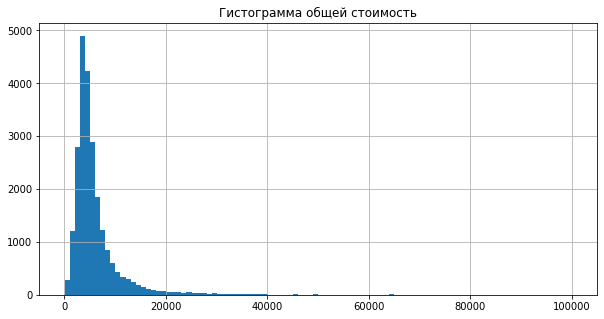

In [66]:
# Строим гистограмму по общей цене ('last_price')
df.hist('last_price',bins=100, range=(100,100000),figsize=(10,5))
plt.title('Гистограмма общей стоимость')

Text(0.5, 1.0, 'Общая стоимость')

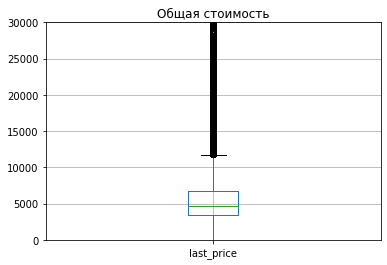

In [67]:
# Строим диаграмму размаха методом .boxplot(). Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси.
plt.ylim(0, 30000)
df.boxplot('last_price')
plt.title('Общая стоимость')

In [68]:
# Проверим столбец 'last_price' на анамальные значения методом .describe().
df['last_price'].describe().astype(int)

count     23462
mean       6419
std       10063
min          12
25%        3400
50%        4622
75%        6750
max      763000
Name: last_price, dtype: int64

In [93]:
# Сделаем срез в last_price. Уберем значения больше 30000 (их можно считать выбросами)
df = df.query('last_price < 30000')

Построив гистограмму, далее диаграмму размаха и воспользовавшись методом describe() в столбце "last_price" мы наблюдаем выбросы, которые можно срезать. 

Text(0.5, 1.0, 'Гистограмма общей площади')

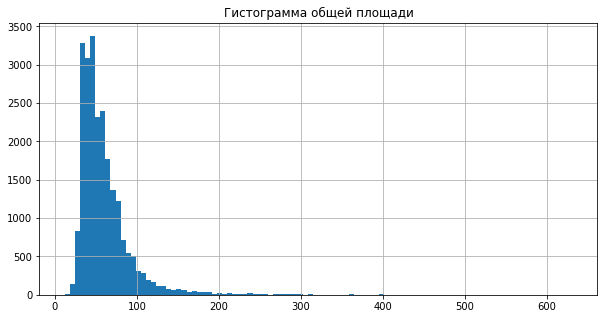

In [69]:
# Строим гистограмму по общей площади ('total_area')
df.hist('total_area',bins=100,figsize=(10,5))
plt.title('Гистограмма общей площади')

Text(0.5, 1.0, 'Общая площадь')

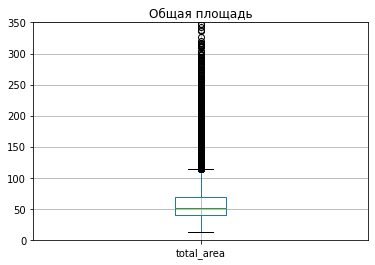

In [70]:
# Строим диаграмму размаха методом .boxplot(). Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси.
plt.ylim(0, 350)
df.boxplot('total_area')
plt.title('Общая площадь')

In [71]:
# Проверим столбец 'total_area' на анамальные значения методом .describe().
df['total_area'].describe().astype(int)

count    23462
mean        59
std         33
min         12
25%         40
50%         52
75%         69
max        631
Name: total_area, dtype: int64

In [72]:
# Сделаем срез в total_area. Уберем значения больше 200 (их можно считать выбросами)
df = df.query('total_area < 200')

Построив гистограмму, далее диаграмму размаха и воспользовавшись методом describe() в столбце "total_area" мы наблюдаем выбросы, которые можно срезать. 

Text(0.5, 1.0, 'Гистограмма числа комнат')

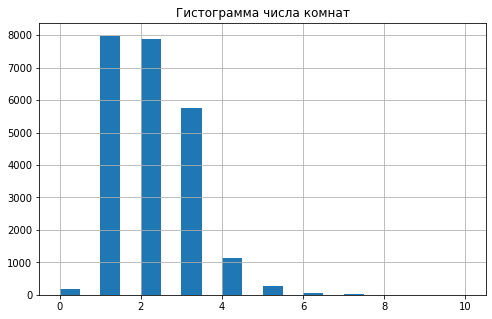

In [73]:
# Строим гистограмму числа комнат ('rooms')
df.hist('rooms',bins=20,range=(0,10),figsize=(8,5))
plt.title('Гистограмма числа комнат')

Text(0.5, 1.0, 'Число комнат')

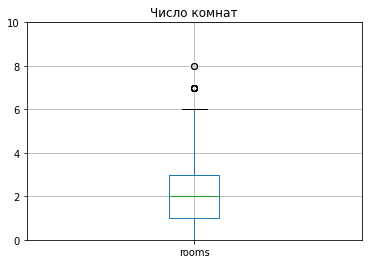

In [74]:
# Строим диаграмму размаха методом .boxplot(). Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси.
plt.ylim(0, 10)
df.boxplot('rooms')
plt.title('Число комнат')

In [75]:
# Проверим столбец 'rooms' на анамальные значения методом .describe().
df['rooms'].describe().astype(int)

count    23253
mean         2
std          0
min          0
25%          1
50%          2
75%          3
max         11
Name: rooms, dtype: int64

In [76]:
# Сделаем срез в rooms. Уберем значения больше 6 (их можно считать выбросами)
df = df.query('rooms < 6')

Построив гистограмму, далее диаграмму размаха и воспользовавшись методом describe() в столбце "rooms" мы наблюдаем выбросы, которые можно срезать. 

Text(0.5, 1.0, 'Гистограмма высоты потолков')

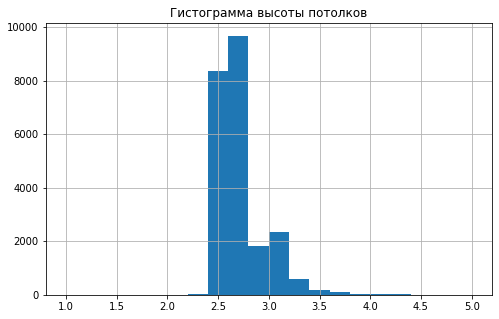

In [77]:
# Строим гистограмму высоты потолков ('ceiling_height')
df.hist('ceiling_height',bins=20,figsize=(8,5))
plt.title('Гистограмма высоты потолков')

Text(0.5, 1.0, 'Высота потолков')

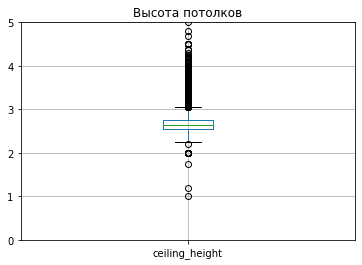

In [78]:
# Строим диаграмму размаха методом .boxplot(). Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси.
plt.ylim(0, 5)
df.boxplot('ceiling_height')
plt.title('Высота потолков')

In [79]:
# Проверим столбец 'ceiling_height' на анамальные значения методом .describe().
df['ceiling_height'].describe().astype(float)

count    23167.000000
mean         2.700333
std          0.219681
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.000000
Name: ceiling_height, dtype: float64

In [79]:
df = df.query('ceiling_height > 2.0 and ceiling_height < 4.0')

Text(0.5, 1.0, 'Гистограмма времени продажи квартиры')

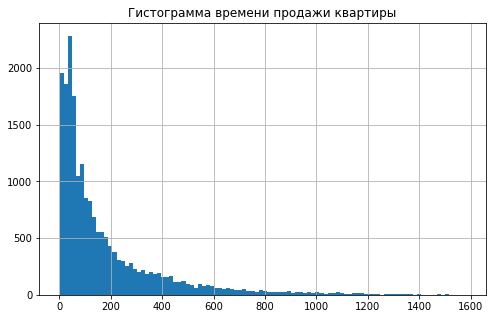

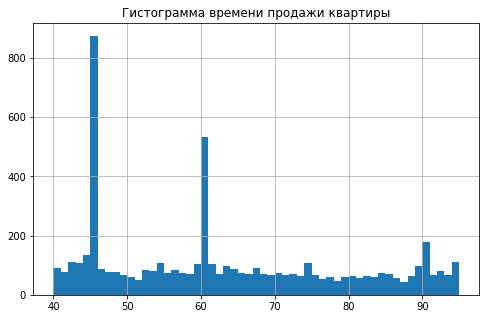

In [80]:
# Строим гистограмму по времени продажи квартиры ('days_exposition')
df.hist('days_exposition',bins=100,figsize=(8,5))
plt.title('Гистограмма времени продажи квартиры')
# Замечем несколько явных всплесков. Увеличим масштаб, для понимания. Это значения 45, 60 и 90
df.hist('days_exposition',bins=55,figsize=(8,5), range=(40,95))
plt.title('Гистограмма времени продажи квартиры')

Text(0.5, 1.0, 'Время продажи квартиры')

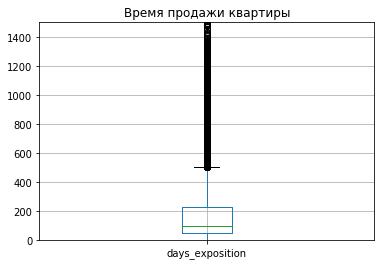

In [81]:
# Строим диаграмму размаха методом .boxplot(). Применим метод ylim(y_min, y_max) для изменения масштаба по вертикальной оси.
plt.ylim(0, 1500)
df.boxplot('days_exposition')
plt.title('Время продажи квартиры')

Сделки, которые прошли быстре, чем 45 дней можно считать быстрыми, а сделки, воторые были дольше 228 дней - долгими.

In [80]:
# Проверим столбец 'days_exposition' на анамальные значения методом .describe().
df['days_exposition'].describe().astype(int)

count    20092
mean       179
std        218
min          1
25%         45
50%         94
75%        229
max       1580
Name: days_exposition, dtype: int64

In [87]:
# Сделаем срез, который уберет нам явные выбросы.
df = df.query('days_exposition < 800 and\
        (days_exposition > 46 or days_exposition < 45) and\
        (days_exposition > 61 or days_exposition < 60) and\
        (days_exposition > 91 or days_exposition < 90)')

Text(0.5, 1.0, 'Время продажи квартиры')

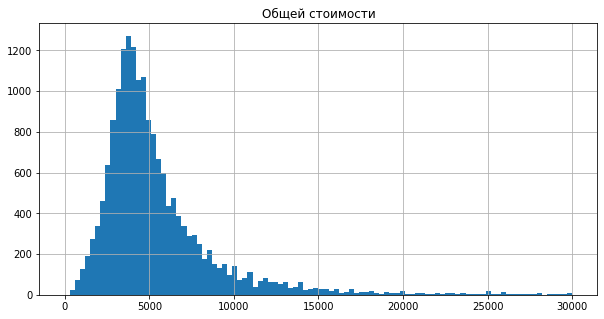

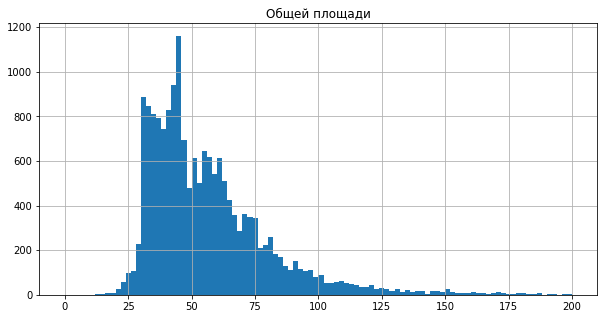

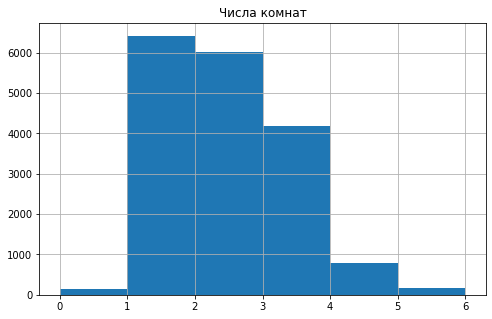

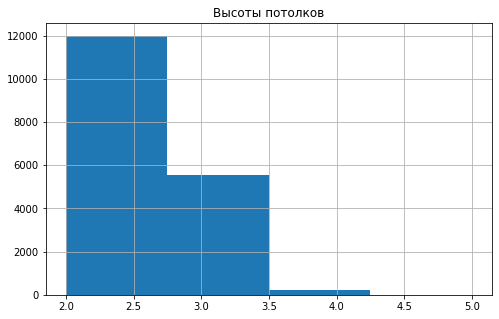

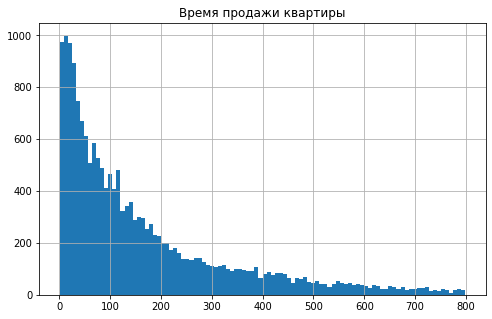

In [88]:
# Снова построим гистограммы
df.hist('last_price',bins=100, range=(0,30000), figsize=(10,5))
plt.title('Общей стоимости')
df.hist('total_area',bins=100,figsize=(10,5), range=(0,200))
plt.title('Общей площади')
df.hist('rooms',bins=6,range=(0,6),figsize=(8,5))
plt.title('Числа комнат')
df.hist('ceiling_height',bins=4,figsize=(8,5), range=(2,5))
plt.title('Высоты потолков')
df.hist('days_exposition',bins=100,figsize=(8,5))
plt.title('Время продажи квартиры')

In [94]:
df['last_price'].describe()

count    17646.000000
mean      5417.859118
std       3517.229650
min         12.000000
25%       3400.000000
50%       4500.000000
75%       6300.000000
max      29999.000000
Name: last_price, dtype: float64

# "Какие факторы больше всего влияют на стоимость квартиры?"

Text(0, 0.5, 'Общая площадь')

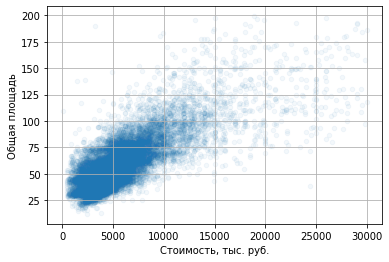

In [95]:
# Проверим, зависит ли цена от квадратного метра (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния 
df.plot(x= 'last_price', y= 'total_area', kind= 'scatter', grid= True, alpha= 0.05)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Общая площадь')


Text(0, 0.5, 'Общая площадь')

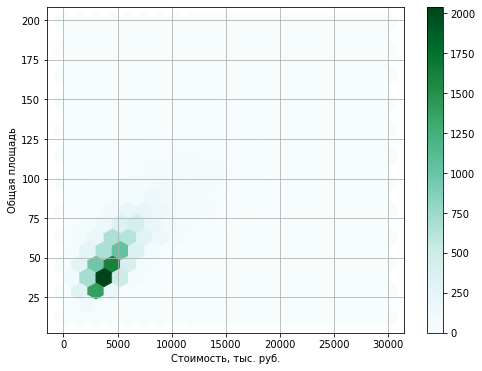

In [96]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'total_area', kind= 'hexbin', grid= True, gridsize= 20, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Общая площадь')


In [97]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['total_area'])

0.7789736667713629

Text(0, 0.5, 'Количество комнат')

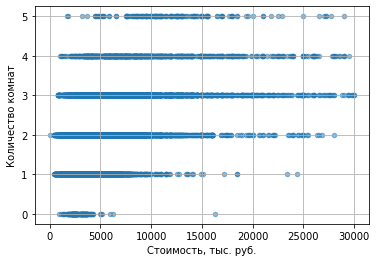

In [98]:
# Проверим, зависит ли цена от числа комнат (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния 
df.plot(x= 'last_price', y= 'rooms', kind= 'scatter', grid= True, alpha= 0.5)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Количество комнат')

Text(0, 0.5, 'Количество комнат')

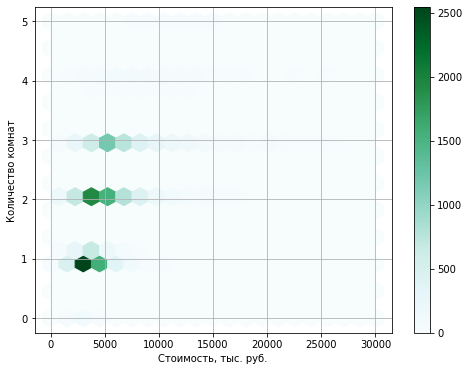

In [99]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'rooms', kind= 'hexbin', grid= True, gridsize= 20, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Количество комнат')

In [100]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['rooms'])

0.48796270319002555

Проверим, зависит ли цена этажа (первый или последний) (Построим несколько вариантов графиков)

Text(0, 0.5, 'Этаж')

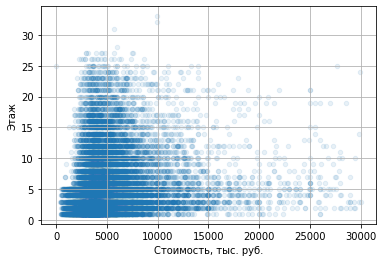

In [101]:
# Зависит ли цена от этажа (первый или последний) (Построим несколько вариантов графиков)
df.plot(x= 'last_price', y= 'floor', kind= 'scatter', grid= True, alpha= 0.1)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Этаж')

Text(0, 0.5, 'Этаж')

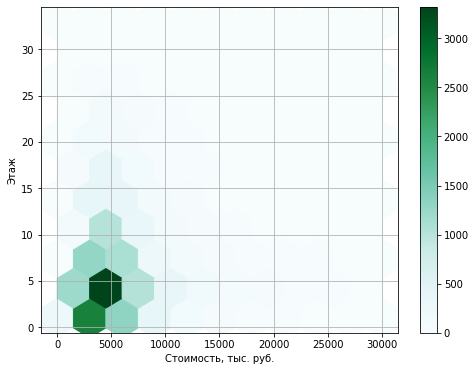

In [102]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'floor', kind= 'hexbin', grid= True, gridsize= 10, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Этаж')

In [103]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['floor'])

0.09237019336488812

In [104]:
floor_status_avg_price = df.groupby('floor_status')['last_price'].mean()
floor_status_avg_price

floor_status
Другой       5627.985370
Первый       4284.141376
Последний    5271.214167
Name: last_price, dtype: float64

Text(0, 0.5, 'Средняя стоимость, тыс. руб.')

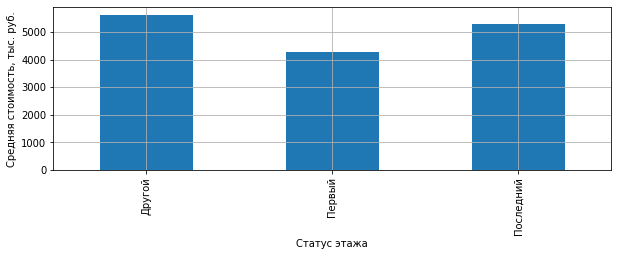

In [105]:
floor_status_avg_price.plot(kind= 'bar', grid= True, figsize= (10,3))
plt.xlabel('Статус этажа')
plt.ylabel('Средняя стоимость, тыс. руб.')

Text(0, 0.5, 'Расстояние от центра в км.')

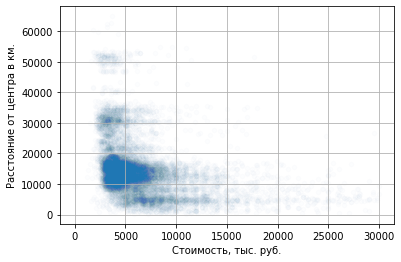

In [106]:
# Проверим, зависит ли цена от расстояния от центра (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния 
df.plot(x= 'last_price', y= 'cityCenters_nearest', kind= 'scatter', grid= True, alpha= 0.01)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Расстояние от центра в км.')

Text(0, 0.5, 'Расстояние от центра в км.')

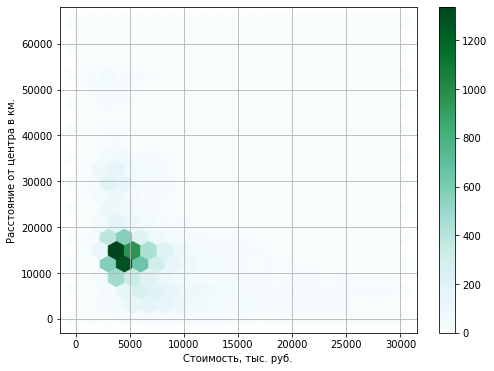

In [107]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'cityCenters_nearest', kind= 'hexbin', grid= True, gridsize= 20, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Расстояние от центра в км.')

In [108]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['cityCenters_nearest'])

-0.34390578329888133

Text(0, 0.5, 'День недели')

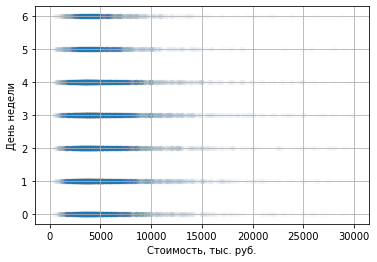

In [109]:
# Проверим, зависит ли цена от дня размещения объявления (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния
df.plot(x= 'last_price', y= 'weekday', kind= 'scatter', grid= True, alpha= 0.01)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('День недели')

Text(0, 0.5, 'День недели')

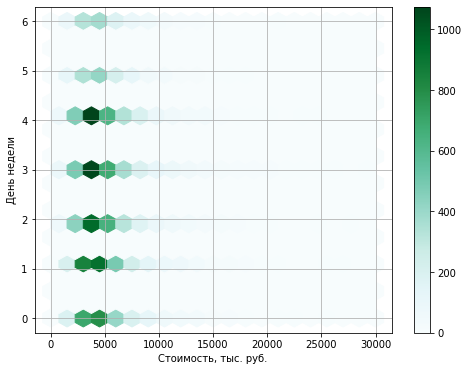

In [110]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'weekday', kind= 'hexbin', grid= True, gridsize= 20, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('День недели')

In [111]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['weekday'])

-0.01615658674638726

Text(0, 0.5, 'Месяц')

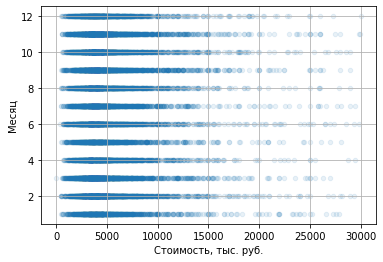

In [112]:
# Проверим, зависит ли цена от месяца размещения объявления (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния
df.plot(x= 'last_price', y= 'month', kind= 'scatter', grid= True, alpha= 0.1)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Месяц')

Text(0, 0.5, 'Месяц')

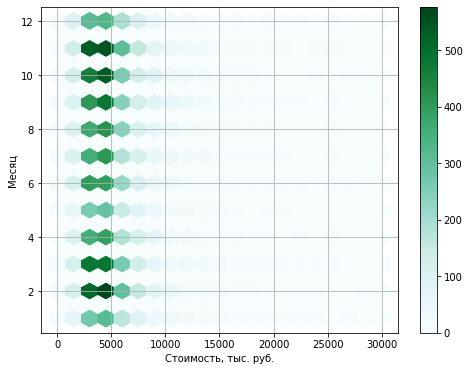

In [113]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'month', kind= 'hexbin', grid= True, gridsize= 20, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Месяц')

In [114]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['month'])

-0.0021518984660712694

Text(0, 0.5, 'Год')

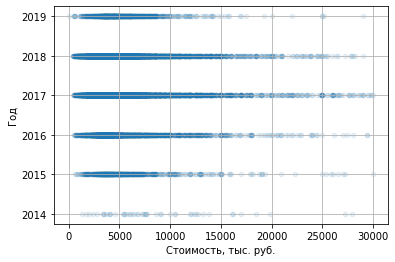

In [115]:
# Проверим, зависит ли цена от года размещения объявления (Построим несколько вариантов графиков)
# Построим диаграмму рассеяния
df.plot(x= 'last_price', y= 'year', kind= 'scatter', grid= True, alpha= 0.1)
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Год')

Text(0, 0.5, 'Год')

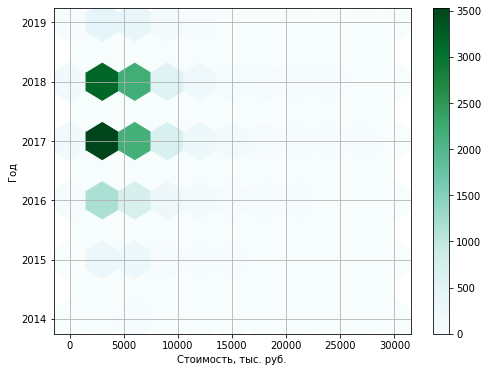

In [116]:
# Построим график, поделённый на шестиугольные области.
df.plot(x= 'last_price', y= 'year', kind= 'hexbin', grid= True, gridsize= 10, sharex= False, figsize= (8,6))
plt.xlabel('Стоимость, тыс. руб.')
plt.ylabel('Год')

In [117]:
# Найдем коэффициент корреляции Пирсона
df['last_price'].corr(df['year'])

-0.043834251091527235

In [118]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km,price_sqm,weekday,month,year,part_living,part_kitchen
total_images,1.000000,0.148428,0.106192,0.080507,0.037169,0.009658,0.090118,0.034044,0.020864,-0.025187,-0.023595,0.090060,0.043214,0.001611,-0.039567,0.026895,0.006058,-0.002134,-0.006588,-0.027992,-0.039218,0.127981,-0.004211,0.023295,0.129436,-0.001793,-0.019485
last_price,0.148428,1.000000,0.778974,0.487963,0.404074,0.094929,0.669951,0.092370,0.009535,-0.055070,-0.035815,0.598888,0.053079,-0.036588,-0.343906,0.265089,0.044389,0.292973,-0.109129,0.099004,-0.344978,0.666764,-0.016157,-0.002152,-0.043834,0.014244,-0.115545
total_area,0.106192,0.778974,1.000000,0.789832,0.349990,-0.033033,0.926400,-0.013324,0.012898,-0.097958,-0.058833,0.578876,0.049527,-0.021412,-0.209185,0.151970,0.009232,0.178377,-0.068477,0.137134,-0.209677,0.121788,-0.014649,-0.001643,-0.097977,0.186844,-0.359298
rooms,0.080507,0.487963,0.789832,1.000000,0.144889,-0.221721,0.867795,-0.159014,-0.006288,-0.164100,-0.099221,0.222397,0.000168,-0.047249,-0.144275,0.110570,-0.043643,0.088487,-0.028241,0.105690,-0.144333,-0.095853,-0.009562,-0.004335,-0.077917,0.513132,-0.597191
ceiling_height,0.037169,0.404074,0.349990,0.144889,1.000000,0.004269,0.293956,0.006233,0.050337,0.016902,0.010755,0.332480,-0.048533,-0.075927,-0.279994,0.210729,-0.050462,0.211775,-0.111456,0.081077,-0.280698,0.274188,-0.009050,-0.006258,-0.054101,-0.058336,0.059932
floors_total,0.009658,0.094929,-0.033033,-0.221721,0.004269,1.000000,-0.154839,0.674183,-0.017119,0.068663,0.054003,0.219908,0.176302,0.107931,-0.006715,-0.161867,0.099471,-0.055925,0.039787,-0.057178,-0.007440,0.255765,0.017314,0.013474,0.024265,-0.360157,0.342115
living_area,0.090118,0.669951,0.926400,0.867795,0.293956,-0.154839,1.000000,-0.104778,0.012327,-0.068651,-0.038850,0.349976,0.014633,-0.047337,-0.198744,0.159715,-0.031233,0.151625,-0.048073,0.128198,-0.199049,0.031216,-0.010376,-0.005091,-0.091452,0.512532,-0.545893
floor,0.034044,0.092370,-0.013324,-0.159014,0.006233,0.674183,-0.104778,1.000000,-0.010009,0.032948,0.046393,0.165380,0.171068,0.073967,-0.005861,-0.105755,0.081061,-0.034346,0.019173,-0.040676,-0.006456,0.202283,0.016130,0.020027,0.013095,-0.263135,0.244562
is_apartment,0.020864,0.009535,0.012898,-0.006288,0.050337,-0.017119,0.012327,-0.010009,1.000000,-0.003157,-0.002128,0.022713,0.037648,0.021977,0.023642,0.005600,-0.023852,0.009329,0.011423,-0.003546,0.023618,0.008974,-0.002007,-0.007820,0.025386,0.000385,0.008991
studio,-0.025187,-0.055070,-0.097958,-0.164100,0.016902,0.068663,-0.068651,0.032948,-0.003157,1.000000,-0.004384,-0.086805,0.025451,-0.028451,-0.012508,-0.032518,0.005850,-0.008335,0.008129,-0.025631,-0.013091,0.034400,0.000689,0.002148,0.023686,0.100126,-0.003136


Text(0.5, 1.0, 'Correlation Heatmap')

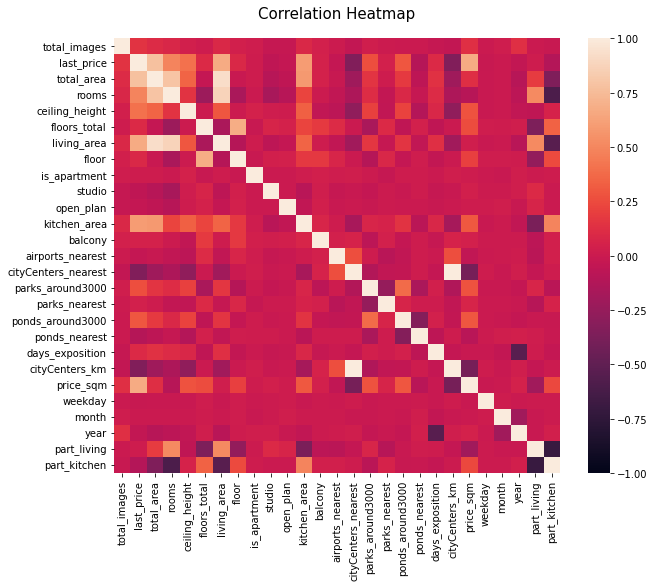

In [119]:
plt.figure(figsize=(10, 8)) 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=20)

### Вывод
Мы можем наблюдать такие зависимости:<br>
1. На итоговую цену пропорицонально имеет большее влияние таких параметров, как общая площадь квартиры, жилая площадь, и так же обратно пропорцинально приблеженность к центру (чем ближе, тем дороже).<br>
2. Малозначительно, но все же влияют на стоимость: количество комнат в квартире, высота потолков и площадь кухни.<br>
3. Все остальные параметры незначительно влияют на стоимость квартир.<br>
4. Зависимость от даты размещения: дня недели, месяца и года не оказывает никакого влияния


In [121]:
# Выберем 10 населённых пунктов с наибольшим числом объявлений.
df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
санкт-петербург      11795
поселок мурино         490
поселок шушары         364
всеволожск             298
пушкин                 271
колпино                271
поселок парголово      257
деревня кудрово        255
гатчина                230
выборг                 171
Name: locality_name, dtype: int64

In [122]:
# Сделаем срез, в который поместим ТОП10 городов по числу объявлений.
top_10 = df.query('locality_name == ["санкт-петербург", "поселок муриноо", "поселок шушары", "всеволожск", "колпино", "поселок парголово", "пушкин","деревня кудрово", "гатчина", "выборг"]')
# Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
price_qm_avg = top_10.pivot_table(index='locality_name', values=['price_sqm'], aggfunc='mean')
price_qm_avg.sort_values(by= 'price_sqm', ascending=False)


,price_sqm
locality_name,
санкт-петербург,107.782705
пушкин,101.324723
деревня кудрово,91.788235
поселок парголово,89.466926
поселок шушары,77.417582
колпино,74.461255
всеволожск,68.127517
гатчина,67.052174
выборг,56.508772


<AxesSubplot:xlabel='locality_name'>

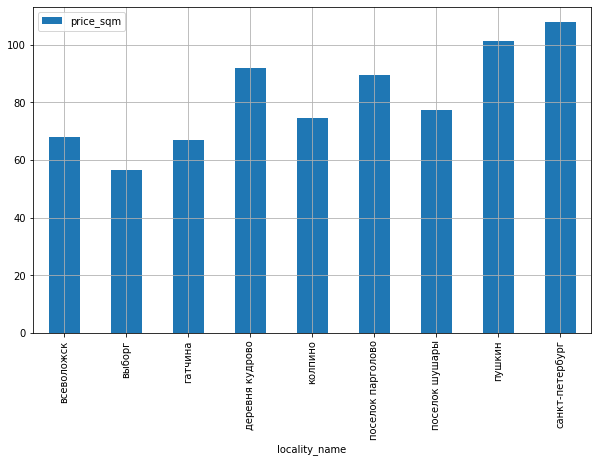

In [123]:
price_qm_avg.plot(grid=True, figsize=(10, 6), kind= 'bar', )

Мы видим, что самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая стоимость жилья в Выборге.

In [124]:
# Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
df_city_centers = df.dropna(subset=['cityCenters_nearest'])
# Выделим квартиры в Санкт-Петербурге
df_city_centers = df_city_centers.query('locality_name == "санкт-петербург"')
df_city_centers.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km,price_sqm,floor_status,weekday,month,year,part_living,part_kitchen
2,10,5196,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,14.0,92,Другой,3,8,2015,0.612500,0.148214
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0,100,Другой,1,6,2018,0.320000,0.410000
9,18,5400,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,15.0,88,Другой,6,2,2017,0.714754,0.106557
10,5,5050,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,14.0,127,Другой,3,11,2017,0.512626,0.214646
15,16,4650,39.0,2017-11-18,1,2.60,14,20.5,5,False,False,False,7.6,1,санкт-петербург,12900.0,14259.0,1,590.0,1,296.0,19.0,14.0,119,Другой,5,11,2017,0.525641,0.194872


In [126]:
# После этого посчитаем среднюю цену для каждого километра.
price_km_avg = df_city_centers.pivot_table(index='cityCenters_km', values=['price_sqm'], aggfunc='mean')
price_km_avg.head(10)

,price_sqm
cityCenters_km,
0.0,129.333333
1.0,133.280000
2.0,126.886486
3.0,111.427928
4.0,122.525275
5.0,129.648649
6.0,129.134518
7.0,127.098592
8.0,120.049774


Text(0, 0.5, 'Стоимость, тыс. руб.')

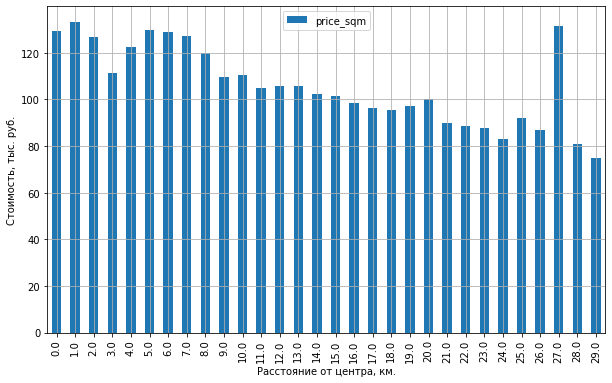

In [131]:
# Построим гистограмму расстояния от центра
price_km_avg.plot(kind= 'bar', grid= True, figsize=(10, 6))
plt.xlabel('Расстояние от центра, км.')
plt.ylabel('Стоимость, тыс. руб.')

Мы видим, что цена резко падает на расстоянии после 3 км от центра, потом с 6 км по 8 км цена выростает и далее падает по наклонной, но мы видим аномальный всплеск на 27 км, где цена достигает цены кв метра центра.

In [132]:
# Выделим сегмент квартир в центре. Если мы принимаем за центр расстояние от 0 до 8 км, то необходимо сделать срез.
df_around_center = df.query('cityCenters_km <= 8')
df_around_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_km,price_sqm,floor_status,weekday,month,year,part_living,part_kitchen
4,2,10000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,8.0,100,Другой,1,6,2018,0.320000,0.410000
24,8,6500,97.2,2015-10-31,2,2.80,3,46.5,1,False,False,False,19.6,0,санкт-петербург,20052.0,2336.0,3,411.0,3,124.0,265.0,2.0,66,Первый,5,10,2015,0.478395,0.201646
35,6,15500,149.0,2017-06-26,5,2.55,5,104.0,4,False,False,False,17.0,0,санкт-петербург,23670.0,3502.0,0,NaN,1,779.0,644.0,4.0,104,Другой,0,6,2017,0.697987,0.114094
61,18,7990,74.0,2017-08-24,2,3.00,4,43.0,4,False,False,False,20.0,0,санкт-петербург,22568.0,4288.0,1,363.0,0,NaN,609.0,4.0,107,Последний,3,8,2017,0.581081,0.270270
63,2,20000,118.0,2018-09-11,3,3.00,9,68.0,7,False,False,False,16.0,0,санкт-петербург,26055.0,4800.0,1,648.0,1,779.0,37.0,5.0,169,Другой,1,9,2018,0.576271,0.135593


In [133]:
# Выделим факторы, которые влияют на стоимость квартиры - число комнат.
df_around_center['last_price'].corr(df_around_center['rooms'])

0.4547437913419562

In [134]:
rooms_last_price_center = df_around_center.pivot_table(index='rooms', values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

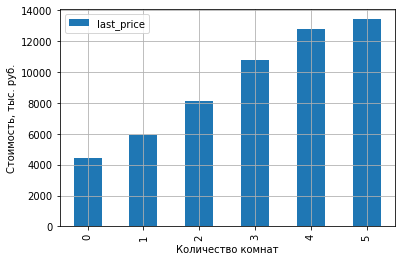

In [135]:
rooms_last_price_center.plot(kind= 'bar', grid= True)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость, тыс. руб.')

In [136]:
# Выделим факторы, которые влияют на стоимость квартиры - этаж.
df_around_center['last_price'].corr(df_around_center['floor'])

0.19919284000767382

In [137]:
floor_last_price_center = df_around_center.pivot_table(index='floor', values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

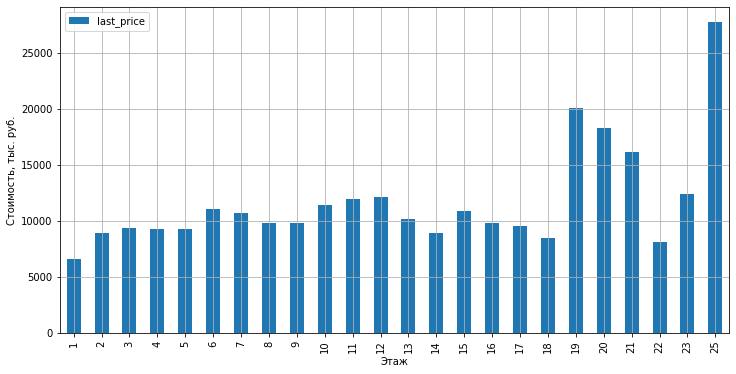

In [138]:
floor_last_price_center.plot(kind= 'bar', grid= True, figsize= (12,6))
plt.xlabel('Этаж')
plt.ylabel('Стоимость, тыс. руб.')

In [139]:
# Выделим факторы, которые влияют на стоимость квартиры - удалённость от центра.
df_around_center['last_price'].corr(df_around_center['cityCenters_km'])

-0.11280403088518144

In [140]:
cityCenters_km_last_price_center = df_around_center.pivot_table(index='cityCenters_km',
                                                                values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

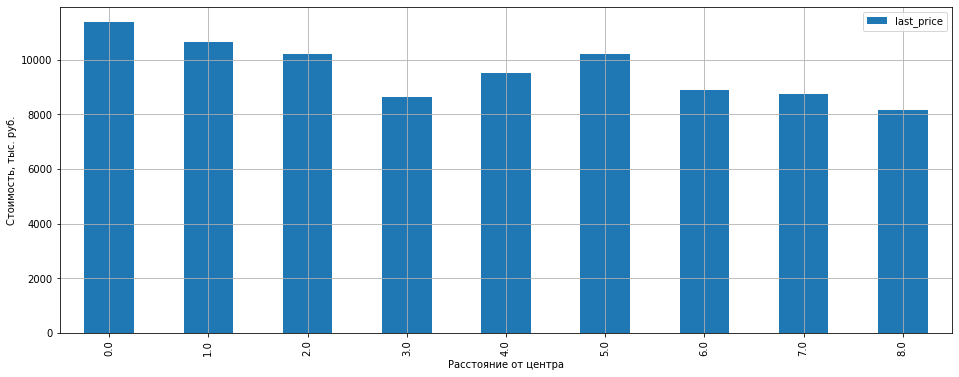

In [141]:
cityCenters_km_last_price_center.plot(kind= 'bar', grid= True, figsize= (16,6))
plt.xlabel('Расстояние от центра')
plt.ylabel('Стоимость, тыс. руб.')

In [142]:
# Выделим факторы, которые влияют на стоимость квартиры - дата размещения объявления(дни недели).
df_around_center['last_price'].corr(df_around_center['weekday'])

-0.02544545933849909

In [143]:
weekday_last_price_center = df_around_center.pivot_table(index='weekday', values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

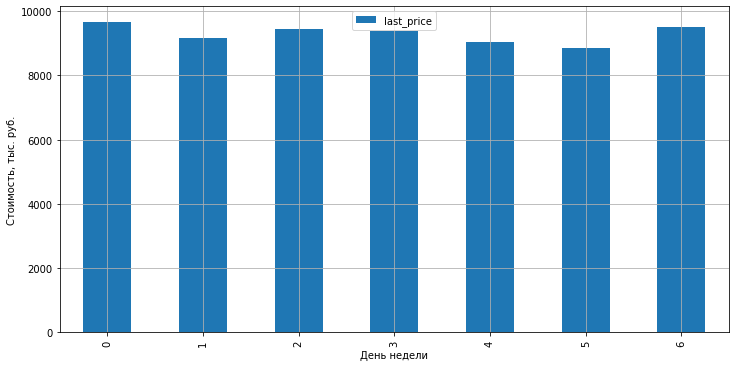

In [144]:
weekday_last_price_center.plot(kind= 'bar', grid= True, figsize= (12,6))
plt.xlabel('День недели')
plt.ylabel('Стоимость, тыс. руб.')

In [145]:
# Выделим факторы, которые влияют на стоимость квартиры - дата размещения объявления(месяца).
df_around_center['last_price'].corr(df_around_center['month'])

-0.011809318377948852

In [146]:
month_last_price_center = df_around_center.pivot_table(index='month', values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

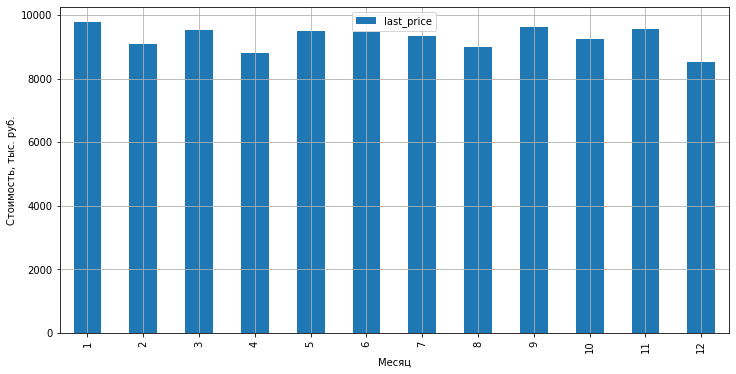

In [147]:
month_last_price_center.plot(kind= 'bar', grid= True, figsize= (12,6))
plt.xlabel('Месяц')
plt.ylabel('Стоимость, тыс. руб.')

In [148]:
# Выделим факторы, которые влияют на стоимость квартиры - дата размещения объявления(года).
df_around_center['last_price'].corr(df_around_center['year'])

-0.06915323994028577

In [149]:
year_last_price_center = df_around_center.pivot_table(index='year', values=['last_price'], aggfunc='mean')

Text(0, 0.5, 'Стоимость, тыс. руб.')

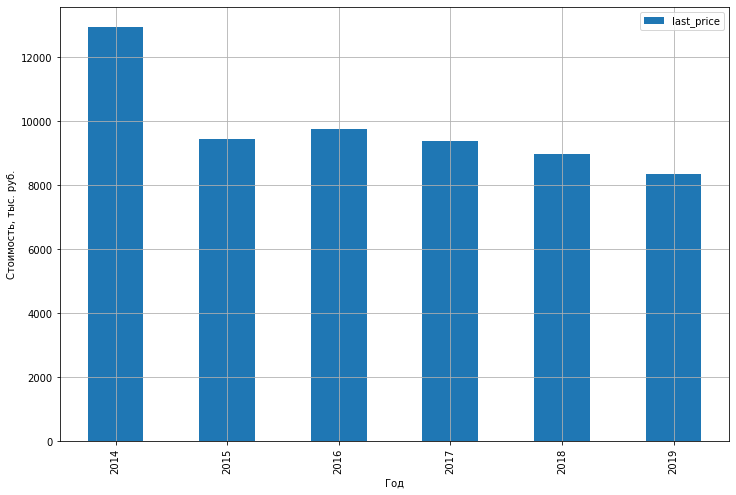

In [150]:
year_last_price_center.plot(kind= 'bar', grid= True, figsize=(12,8))
plt.xlabel('Год')
plt.ylabel('Стоимость, тыс. руб.')

Проведя исследование недвижимости в центре города (радиус до 8 км), мы видим, что на цену кварты влияет количиство комнат в квартире, остальные исследуемые факторы (этаж, растояние до центра, и день/месяц/год публикации объявления) на стоимость не влияют. 

In [151]:
df_after_center = df.query('cityCenters_km > 8')

<AxesSubplot:ylabel='Frequency'>

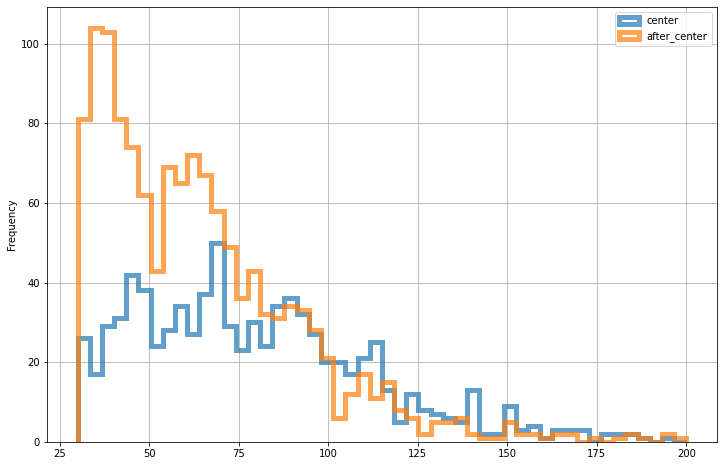

In [155]:
# График зависимости цены от общей площади (в центре и за его пределами)
center = df_around_center.pivot_table(index='last_price', values=['total_area'], aggfunc='mean')
after_center = df_after_center.pivot_table(index='last_price', values=['total_area'], aggfunc='mean')

ax = center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(30, 200),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='center',
    figsize=(12,8)
)
after_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(30, 200),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='after_center',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

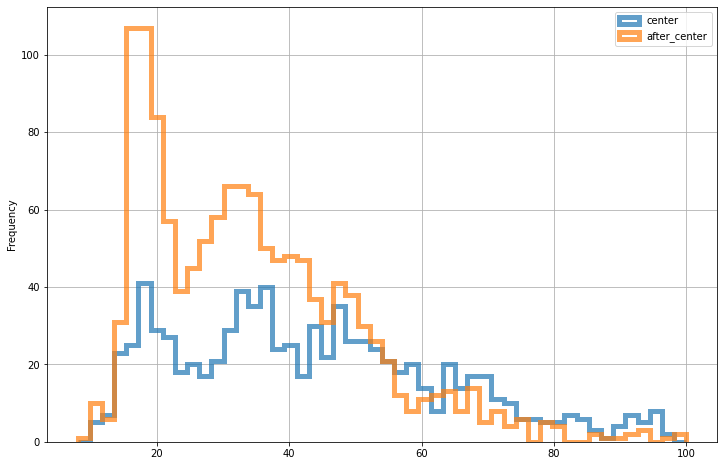

In [154]:
# График зависимости цены от жилой площади (в центре и за его пределами)
center = df_around_center.pivot_table(index='last_price', values=['living_area'], aggfunc='mean')
after_center = df_after_center.pivot_table(index='last_price', values=['living_area'], aggfunc='mean')

ax = center.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(8, 100),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='center',
    figsize=(12,8)
)
after_center.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(8, 100),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='after_center',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

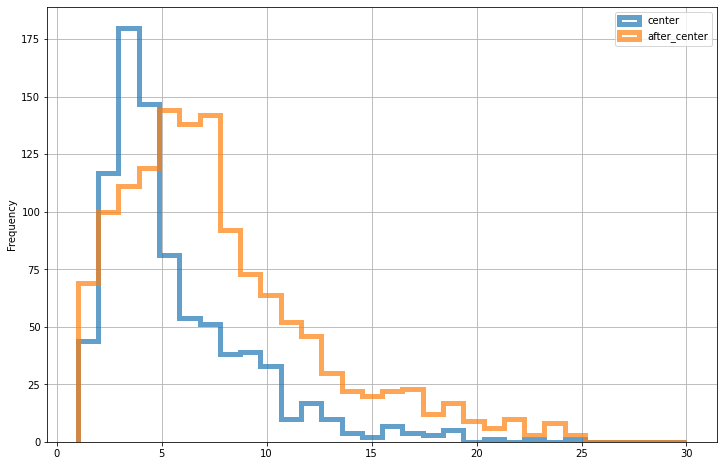

In [156]:
# График зависимости цены от этажа (в центре и за его пределами)
center = df_around_center.pivot_table(index='last_price', values=['floor'], aggfunc='mean')
after_center = df_after_center.pivot_table(index='last_price', values=['floor'], aggfunc='mean')

ax = center.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(1, 30),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='center',
    figsize=(12,8)
)
after_center.plot(
    kind='hist',
    y='floor',
    histtype='step',
    range=(1, 30),
    bins=30,
    linewidth=5,
    alpha=0.7,
    label='after_center',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

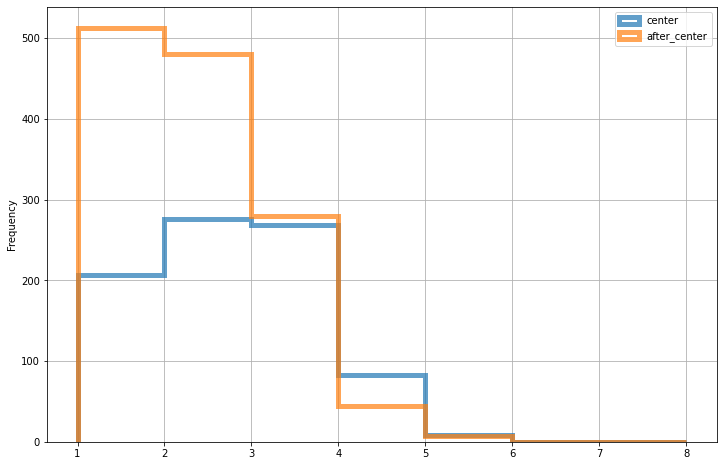

In [157]:
# График зависимости цены от колличества комнат (в центре и за его пределами)
center = df_around_center.pivot_table(index='last_price', values=['rooms'], aggfunc='mean')
after_center = df_after_center.pivot_table(index='last_price', values=['rooms'], aggfunc='mean')

ax = center.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    range=(1, 8),
    bins=7,
    linewidth=5,
    alpha=0.7,
    label='center',
    figsize=(12,8)
)
after_center.plot(
    kind='hist',
    y='rooms',
    histtype='step',
    range=(1, 8),
    bins=7,
    linewidth=5,
    alpha=0.7,
    label='after_center',
    ax=ax,
    grid=True,
    legend=True,
)

<AxesSubplot:ylabel='Frequency'>

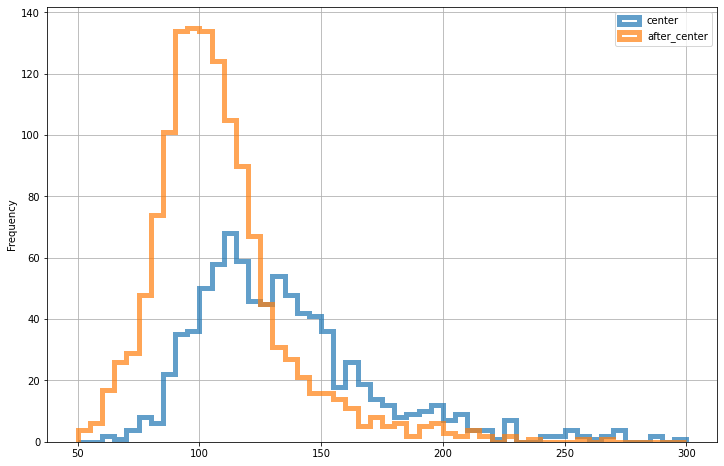

In [158]:
# График зависимости цены от стоимости квадратного метра (в центре и за его пределами)
center = df_around_center.pivot_table(index='last_price', values=['price_sqm'], aggfunc='mean')
after_center = df_after_center.pivot_table(index='last_price', values=['price_sqm'], aggfunc='mean')

ax = center.plot(
    kind='hist',
    y='price_sqm',
    histtype='step',
    range=(50, 300),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='center',
    figsize=(12,8)
)
after_center.plot(
    kind='hist',
    y='price_sqm',
    histtype='step',
    range=(50, 300),
    bins=50,
    linewidth=5,
    alpha=0.7,
    label='after_center',
    ax=ax,
    grid=True,
    legend=True,
)

## Общий вывод

Анализируя датасет:
- С помощью метода .isna() были найдены пропущенные значения в столбцах.
- В столбцах были устранены пропуски (там, где это требовалось) методом .fillna()
- В столбац, где требовалось, была произведена замена типа данных методом .astype()
- Столбец df[locality_name] был проверен на неявные дубликаты и прозведена замена "ё" на "е"
- Столбец df[locality_name] был приведен к нижнему регистру с помощью метода .str.lower()
- Был преобразован столбец df[first_day_exposition] в читаемый формат.	

Переходя к итогам исследования:
1. Были добавлены столбцы для исследования df['price_sqm'] - цена квадратного метра, df['floor_status'] - категорийность этажей, df['part_kitchen'] - доля кухни от всей площади, df['part_living'] - доля жилой площади от всей площади.
2. Далее мы построили графики по ['last_price', 'total_area', 'rooms', 'ceiling_height', 'days_exposition']
3. С помощью построиных графиков мы избавились от выбросов и анамалий.
4. На итоговую цену пропорицонально имеет большее влияние таких параметров, как общая площадь квартиры, жилая площадь, и так же обратно пропорцинально приблеженность к центру (чем ближе, тем дороже).
5. Малозначительно, но все же влияют на стоимость: количество комнат в квартире, высота потолков и площадь кухни.
6. Все остальные параметры незначительно влияют на стоимость квартир.
7. Зависимость от даты размещения: дня недели, месяца и года не оказывает никакого влияния
8. Определили границы, которые можно считать центром (радиус 8 км)
9. Нашли 10 городов с наибольшим количесвом объявлений и сохранили в переменной `top_10`
10. Нашли цену квадратного метра в каждом из 10 городов и сохранили в переменной `price_qm_avg`
11. Изучили квартиры в Санкт-Петербурге и нашли стоимоть квадраного метра в зависимости от центра в переменной `price_km_avg`
12. Исследовали зависимости цены квартир в центра от таких параметров,  как количесво комнат, этаж, расстояние от центра, дата размещения объявления.

Можно сделать вывод, что в зависимости от местоположения квартиры на нее влияют разные факторы, от которых зависит цена.

